# Title of ML project:Air Quality Prediction
### Name : Ziyad P 
### Organization:Entri Elevate
    Overview of Problem Statement:
    The quality of air significantly impacts public health, the environment, and overall quality of life. Monitoring and predicting air quality is crucial for taking proactive measures to mitigate the effects of pollution. However, accurately forecasting the Air Quality Index (AQI) is challenging due to the complex interaction of various factors such as geographic location, weather conditions, industrial activities, and population density. Therefore, developing an effective prediction model for AQI can aid in environmental management, policy-making, and public health initiatives
### Objective:
    The primary objective of this project is to develop a robust predictive model that accurately forecasts Air Quality Index (AQI) values for various countries based on a dataset containing AQI values, geographic coordinates, and possibly other relevant features. This model aims to help understand the factors affecting air quality and predict future air quality levels, enabling proactive measures for improving environmental health.


### Data description
Source:kaggle; Features:
    The dataset, titled "AQI and Lat Long of Countries," includes the following key features:
1. Country
2. City  32. AQI Value  4
3. AQI Category 5
4. CO AQI Value6 
5. CO AQI Categor7  
6. Ozone AQI Val8e  
7. Ozone AQI Categ9ry  
8. NO2 AQI V10lue  
9. NO2 AQI Cat11ory  
10.  PM2.5 AQI12alue  
11.  PM2.5 AQI C13egory  
14.  lat  
13.  lng

First 5 rows of the dataset:
               Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2              Brazil  Presidente Dutra         41         Good             1   
3               Italy   Priolo Gargallo         66     Moderate             1   
4              Poland         Przasnysz         34         Good             1   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Cate

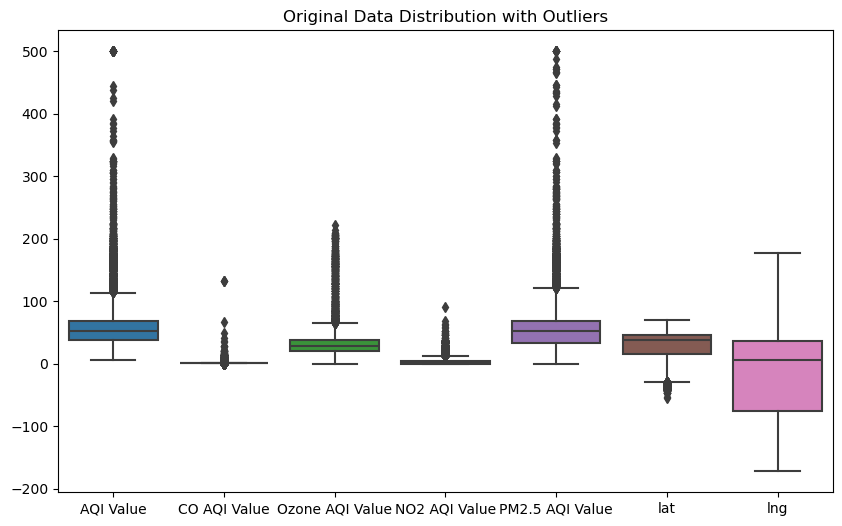

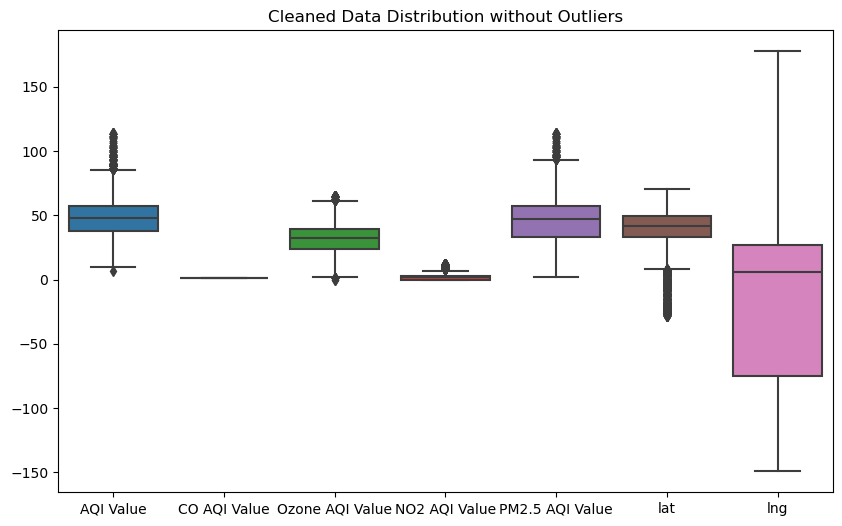

Skewness of numerical features before transformation:
 NO2 AQI Value      1.461599
AQI Value          0.898429
PM2.5 AQI Value    0.383329
lng                0.261354
CO AQI Value       0.000000
Ozone AQI Value   -0.045806
lat               -1.453178
dtype: float64
Transformed skewness of numerical features:
 NO2 AQI Value    0.188122
AQI Value        0.020709
dtype: float64


C:\Users\ziyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ziyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ziyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ziyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

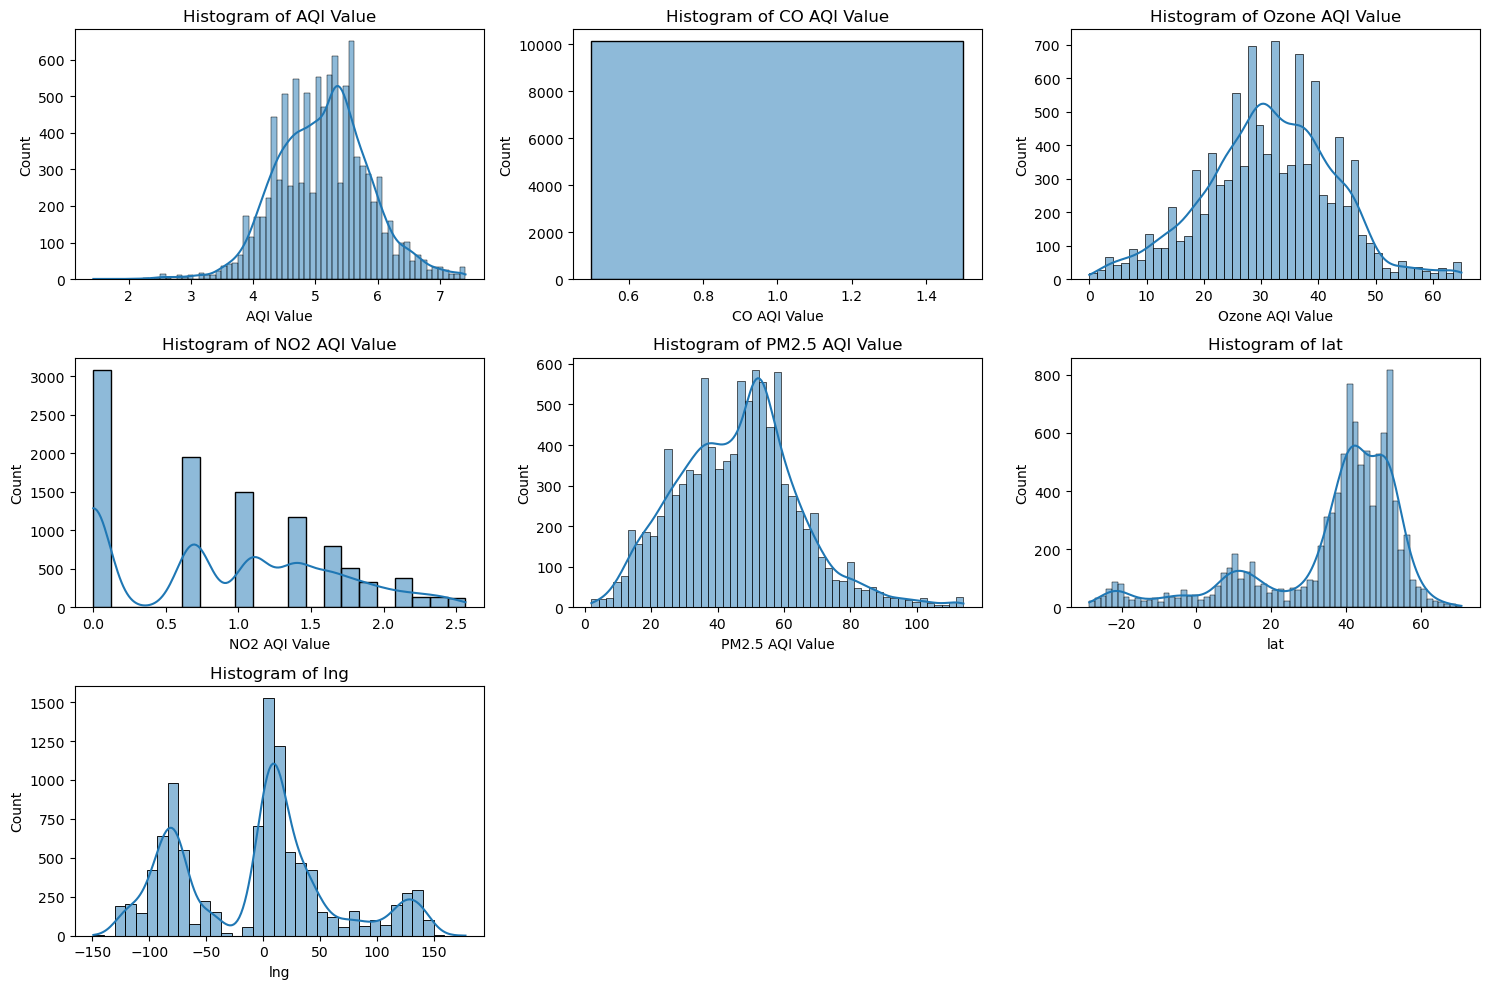

First 5 rows of the final dataset after one-hot encoding:
    AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0       51.0           1.0             36.0            0.0             51.0   
1       41.0           1.0              5.0            1.0             41.0   
2       41.0           1.0              5.0            1.0             41.0   
3       66.0           1.0             39.0            2.0             66.0   
4       34.0           1.0             34.0            0.0             20.0   

       lat      lng  Country_Afghanistan  Country_Albania  Country_Algeria  \
0  44.7444  44.2031                False            False            False   
1  -5.2900 -44.4900                False            False            False   
2 -11.2958 -41.9869                False            False            False   
3  37.1667  15.1833                False            False            False   
4  53.0167  20.8833                False            False            False  

C:\Users\ziyad\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [    0     6    17 ... 14407 14408 14431] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ziyad\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\ziyad\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected features using SelectKBest:
 Index(['PM2.5 AQI Value', 'City_Brookside', 'City_Jurbarkas', 'City_Lindlar',
       'City_Soro', 'AQI Value_CO AQI Value', 'AQI Value_Ozone AQI Value',
       'AQI Value_PM2.5 AQI Value', 'CO AQI Value_PM2.5 AQI Value',
       'Ozone AQI Value_PM2.5 AQI Value'],
      dtype='object')
Top features using RandomForest:
 ['AQI Value_CO AQI Value' 'CO AQI Value_PM2.5 AQI Value' 'PM2.5 AQI Value'
 'AQI Value_PM2.5 AQI Value' 'CO AQI Value_lng' 'Country_Netherlands'
 'lng' 'City_Bergen' 'AQI Value_lng' 'lat']
Final DataFrame with selected features:
    AQI Value_CO AQI Value  AQI Value_Ozone AQI Value  \
0                    51.0                     1836.0   
1                    41.0                      205.0   
2                    41.0                      205.0   
3                    66.0                     2574.0   
4                    34.0                     1156.0   

   AQI Value_PM2.5 AQI Value  AQI Value_lng  CO AQI Value_PM2.5 AQI Value  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

# Load the dataset
df = pd.read_csv('AQI and Lat Long of Countries.csv')
print("First 5 rows of the dataset:\n", df.head())

# Remove duplicate rows
df = df.drop_duplicates()

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualize the original data distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.title('Original Data Distribution with Outliers')
plt.show()

# Remove outliers from numerical columns
df_cleaned = remove_outliers_iqr(df[num_cols])

# Combine the cleaned numerical data with the categorical data
df_final = pd.concat([df_cleaned.reset_index(drop=True), df[cat_cols].reset_index(drop=True)], axis=1)

# Visualize the cleaned data distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned)
plt.title('Cleaned Data Distribution without Outliers')
plt.show()

# Re-separate numerical columns after outlier removal
num_cols_cleaned = df_cleaned.columns

# Identify skewed numerical features
skewness_before = df_cleaned.skew().sort_values(ascending=False)
print("Skewness of numerical features before transformation:\n", skewness_before)

# Define a threshold for skewness
skew_threshold = 0.75
skewed_features = skewness_before[skewness_before > skew_threshold].index

# Apply log transformation to skewed features (excluding those with zero or negative values)
df_cleaned[skewed_features] = df_cleaned[skewed_features].apply(lambda x: np.log1p(x))

# Alternatively, apply Box-Cox transformation
for feature in skewed_features:
    if df_cleaned[feature].min() > 0 and df_cleaned[feature].nunique() > 1:  # Ensure positive and non-constant data
        df_cleaned[feature], _ = boxcox(df_cleaned[feature])

# Display transformed skewness
skewness_after = df_cleaned[skewed_features].skew().sort_values(ascending=False)
print("Transformed skewness of numerical features:\n", skewness_after)

# Plot histograms for all numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_cleaned.columns):
    plt.subplot(len(df_cleaned.columns) // 3 + 1, 3, i + 1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# One-hot encode categorical columns
df_final_encoded = pd.get_dummies(df_final, columns=cat_cols)

# Display the first 5 rows of the final encoded dataset
print("First 5 rows of the final dataset after one-hot encoding:\n", df_final_encoded.head())

# Ensure there are no missing values before feature selection
df_final_encoded = df_final_encoded.dropna()

# Feature Engineering - Create New Features (Example: Polynomial features, interaction terms)
# As an example, here we are creating a few interaction terms:
for i, col1 in enumerate(num_cols_cleaned):
    for col2 in num_cols_cleaned[i+1:]:
        df_final_encoded[f'{col1}_{col2}'] = df_final_encoded[col1] * df_final_encoded[col2]

# Feature Selection using SelectKBest
X = df_final_encoded.drop(['AQI Value'], axis=1)  # Assuming 'AQI Value' is the target variable
y = df_final_encoded['AQI Value']

# Select the top 10 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected features using SelectKBest:\n", selected_features)

# Feature Selection using RandomForest
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top 10 features based on importance
top_features = feature_importance_df.head(10)['Feature'].values
print("Top features using RandomForest:\n", top_features)

# Finalize the DataFrame with selected features
final_features = np.union1d(selected_features, top_features)
df_final_selected = df_final_encoded[final_features]

print("Final DataFrame with selected features:\n", df_final_selected.head())

# Feature Scaling
scaler = StandardScaler()
df_final_scaled = pd.DataFrame(scaler.fit_transform(df_final_selected), columns=df_final_selected.columns)

print("First 5 rows of the scaled dataset:\n", df_final_scaled.head())

# Split Data into Training and Testing Sets
X = df_final_scaled
y = df_final_encoded['AQI Value']  # Re-assign y to ensure it's not scaled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of Training data:", X_train.shape)
print("Shape of Testing data:", X_test.shape)


In [3]:
#Optimizing Random Forest Classifier Hyperparameters Using Grid Search
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


C:\Users\ziyad\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


In [2]:
#Evaluating the Performance of a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.981243830207305
              precision    recall  f1-score   support

        14.0       1.00      1.00      1.00         1
        15.0       0.00      0.00      0.00         0
        16.0       1.00      1.00      1.00         2
        17.0       0.00      0.00      0.00         2
        18.0       0.00      0.00      0.00         0
        19.0       1.00      1.00      1.00         4
        20.0       0.00      0.00      0.00         0
        21.0       1.00      0.50      0.67         4
        22.0       1.00      1.00      1.00         4
        23.0       1.00      1.00      1.00         6
        24.0       0.86      1.00      0.92         6
        25.0       1.00      1.00      1.00         5
        26.0       1.00      1.00      1.00        15
        27.0       1.00      1.00      1.00        16
        28.0       1.00      1.00      1.00        19
        29.0       1.00      1.00      1.00        18
        30.0       1.00      1.00      1.00        31

C:\Users\ziyad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ziyad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ziyad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ziyad\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [4]:
#Training a Final Random Forest Regressor with Optimized Hyperparameters
final_model = RandomForestRegressor(max_depth=None, min_samples_split=5, n_estimators=300, random_state=42)
final_model.fit(X_train, y_train)


RandomForestRegressor(min_samples_split=5, n_estimators=300, random_state=42)

In [5]:
# Evaluate the final model
train_accuracy = final_model.score(X_train, y_train)
test_accuracy = final_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.999995664441993
Testing Accuracy: 0.9999980227527355


In [29]:
# Save the final model to a file
joblib.dump(final_model, 'final_model.pkl')
print("Model saved as 'final_model.pkl'")


Model saved as 'final_model.pkl'


In [30]:
# Test with Unseen Data:
# Evaluate the final model on unseen data (X_test, y_test)
test_accuracy = final_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

# Final model predictions and evaluation on unseen data
y_pred_final = final_model.predict(X_test)

mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)

print(f"Final Model Evaluation on Unseen Data - MAE: {mae_final:.4f}, MSE: {mse_final:.4f}, RMSE: {rmse_final:.4f}, R2: {r2_final:.4f}")


Testing Accuracy: 0.9999980227527355
Final Model Evaluation on Unseen Data - MAE: 0.0017, MSE: 0.0004, RMSE: 0.0211, R2: 1.0000


# Interpretation of Results (Conclusion):
    After evaluating the model's performance on unseen data, we can analyze the results and draw conclusions. Here are some potential points to consider:
    
    Accuracy on Unseen Data: Assess whether the model's performance on the testing set matches expectations. A high accuracy indicates good generalization ability.
    
    Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2): These metrics provide insights into how well the model's predictions align with the actual values in the testing set. Lower values of MAE, MSE, and RMSE are desirable, indicating smaller prediction errors. R2 closer to 1 suggests a better fit of the model to the data.
    
    Comparison with Training Performance: Compare the model's performance on unseen data with its performance on the training set. Consistency between training and testing metrics indicates a well-generalized model.
    
    Limitations of the Dataset: Discuss any limitations or challenges encountered during model development and evaluation. This could include issues such as data quality, feature selection, or inherent biases in the dataset.

# Future Work:
    Looking ahead, here are some potential avenues for future work to enhance the model and address any identified limitations:
    
    Explore Deep Learning Algorithms: Experiment with deep learning techniques to potentially achieve higher accuracy, especially for complex datasets with non-linear relationships.
    
    Update the Model Periodically: Continuously update the model with new data to ensure its relevance and adaptability to evolving patterns in the dataset.
    
    Address Imbalanced Data: If the dataset suffers from class imbalance, consider employing resampling techniques such as oversampling or undersampling to mitigate bias in model training.
    
    Add More Features: Expand the feature set to capture additional information that could improve the model's predictive power and robustness.
    
    By addressing these points, we can refine the model further and potentially improve its performance over time.